In [157]:
from local_lib.dataset import retreiveDatasetFromCsv
from local_lib.flatten_transformer import FlattenTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.model_selection import train_test_split
from local_lib.non_zero_transformer import NonZeroTransformer
from local_lib.mask_transformer import MaskSeuilTransformer
from local_lib.flatten_transformer import FlattenTransformer
from local_lib.dimension_transformer import DimensionTransformer
import numpy as np
from sklearn.decomposition import PCA

dataset = retreiveDatasetFromCsv()
dataset = dataset.sample(frac=1, random_state=42)

pipeline = Pipeline([
    ('flatten_tr', FlattenTransformer()),
    ('non_zero_tr', NonZeroTransformer()),
    ('mask_tr', MaskSeuilTransformer(strategy="combined"))])

KeyboardInterrupt: 

In [ ]:
# Fit and transform data
X = pipeline.fit_transform(dataset["pixel_value"])
y = np.array(list(dataset["class"]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [ ]:
import numpy as np

y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)
X_train_reshaped = X_train.T
X_test_reshaped = X_test.T

In [ ]:
import copy

# Make a copy of the list
y_train_simpler = copy.deepcopy(y_train)
y_train_simpler[y_train_simpler == 2] = 1

y_test_simpler = copy.deepcopy(y_test)
y_test_simpler[y_test_simpler == 2] = 1

print(np.unique(y_train_simpler))
print(np.unique(y_test_simpler))

[0 1]
[0 1]


In [ ]:
import numpy as np

# Création de la matrice identité
identity_matrix = np.eye(3)
identity_matrix_simpler = np.eye(2)

# Transformation de t1 en t2
y_train_reshaped = identity_matrix[y_train[0]].T
y_test_reshaped = identity_matrix[y_test[0]].T

y_train_simpler_reshaped = identity_matrix_simpler[y_train_simpler[0]].T
y_test_simpler_reshaped = identity_matrix_simpler[y_test_simpler[0]].T

print(y_train_simpler_reshaped.shape)
print(y_test_simpler_reshaped.shape)

(2, 4684)
(2, 1172)


In [ ]:
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.preprocessing import MinMaxScaler

pipeline = Pipeline([
    ('MinMaxScaler', MinMaxScaler())])

X_train_scaled = pipeline.fit_transform(X_train_reshaped)
X_test_scaled = pipeline.fit_transform(X_test_reshaped)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(35860, 4684)
(35860, 1172)


In [ ]:
print(X_train_scaled.min())
print(X_train_scaled.max())

0.0
1.0


In [ ]:
from local_lib.neural_network_classic_batch import NeuralNetworkMultiLayerClassicStrat
mnn = NeuralNetworkMultiLayerClassicStrat(X_train_scaled, y_train_simpler_reshaped, dimensions=tuple([32]), n_iter=1000, lr=0.05, strategy="sub", sub_parts=5)
hist = mnn.fit(X_train_scaled, X_test_scaled, y_train_simpler_reshaped,y_test_simpler_reshaped)

  0%|          | 0/199 [00:00<?, ?it/s]

100%|██████████| 199/199 [03:39<00:00,  1.10s/it]


In [ ]:
y_pred = mnn.predict(X_test_scaled)

Least accuracy :0.8660409556313993
Least recall :0.8660409556313993
Least precision :0.8628509890217883


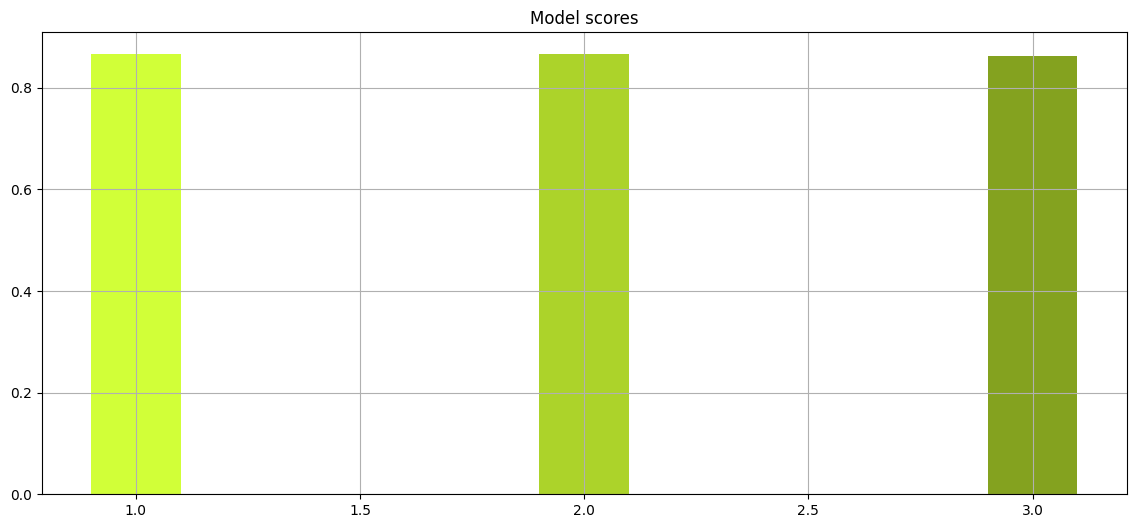

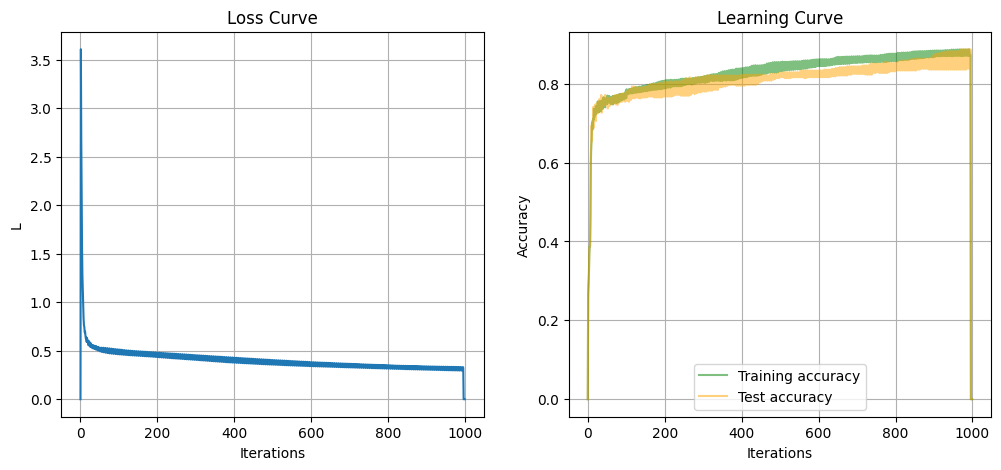

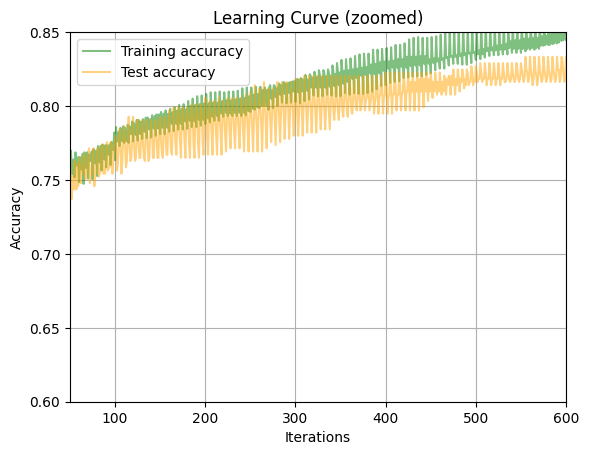

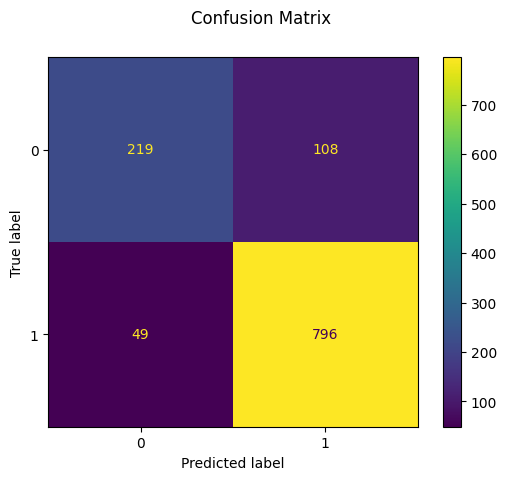

In [ ]:
from local_lib.plotting import plotHist, plotDecisionBoundaries
plotHist(hist, y_test_simpler_reshaped,y_pred, zoomx=(50,600), zoomy=(0.6,0.85))

In [ ]:
mnn.parameters["b1"].shape

(32, 1)

In [ ]:
added_data = (mnn.parameters["W1"] * 1 + mnn.parameters["b1"])

In [ ]:
np.abs(added_data).min()

0.0

In [ ]:
raw_data = np.sum(added_data, axis=0)

In [ ]:
np.random.randint(0,31)

16

In [ ]:
raw_data.min()

-11.079828008478353

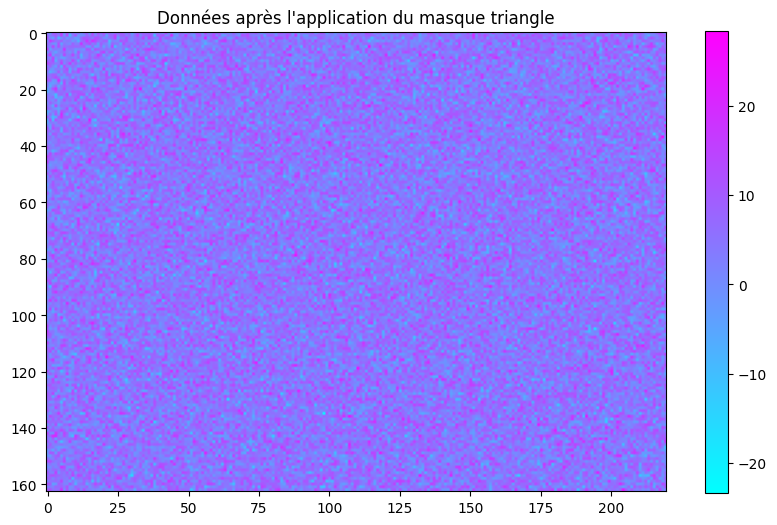

In [158]:
import matplotlib.pyplot as plt
from local_lib.common import common_height, common_width

image = raw_data.reshape(common_height, common_width)

plt.figure(figsize=(10, 6))
plt.imshow(image, cmap='cool')
plt.colorbar()
plt.title('Données après l\'application du masque triangle')
plt.show()

In [159]:
mnn.parameters

{'W1': array([[ 1.3993176 ,  0.3446043 ,  0.26768843, ...,  0.33079715,
         -0.46266628, -0.77265528],
        [ 0.62315742, -0.20756706,  1.23520231, ...,  2.81285669,
         -1.8475131 , -0.1059227 ],
        [-0.75908432,  0.23285423, -0.6282855 , ..., -0.61056557,
          0.44452793, -1.20260868],
        ...,
        [ 0.94306443,  0.12460434, -0.82853118, ...,  0.21923479,
         -0.02579315,  0.03327173],
        [ 0.0720372 ,  0.73637682, -0.1345712 , ...,  1.9628798 ,
         -0.19037081, -0.11379471],
        [-0.40405658,  0.52605007, -1.61692724, ..., -0.53533539,
          0.03198032, -0.1501063 ]]),
 'b1': array([[ 1.1362013 ],
        [-1.0321408 ],
        [ 1.27739009],
        [ 0.21113702],
        [-0.35776287],
        [ 0.19655217],
        [ 0.9210653 ],
        [-1.64004983],
        [-0.46977137],
        [-0.4638052 ],
        [ 0.67157939],
        [ 0.67464086],
        [ 0.12223786],
        [-0.34017459],
        [ 0.38767797],
        [-0.4447